In [4]:
import sys
sys.path.append('..')
from configure.settings import DBSelector
import pandas as pd
import pyecharts.options as opts
from pyecharts.charts import Bar, Line
from pyecharts.charts import Scatter
import pyecharts.options as opts
from pyecharts.charts import Line, Grid
from pyecharts.commons.utils import JsCode
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#c86589'}, {offset: 1, color: '#06a7ff'}], false)"
)

area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#eb64fb'}, {offset: 1, color: '#3fbbff0d'}], false)"
)
db = DBSelector()

In [10]:
engine = db.get_engine('db_stock')

In [6]:
df = pd.read_sql('tb_bond_jisilu',con=engine)

In [8]:
df.sample()

,可转债代码,可转债名称,可转债价格,正股名称,正股代码,正股现价,正股涨跌幅,最新转股价,溢价率,可转债涨幅,...,下修提示,下调次数,转债剩余占总市值比,剩余规模,发行规模,股东配售率,发出强赎公告,强赎日期,担保,更新日期
39,113509,新泉转债,219.81,新泉股份,603179,32.98,3.06,15.25,1.64,0.96,...,,1,0.6,0.778,4.500,71.54,N,None,新泉投资,2021-07-09 15:03


In [9]:
# 溢价率 =（转债现价 - 转股价值）/ 转股价值
def stock_value(bond_price,bondPremRatio):
    return bond_price/(1+bondPremRatio)
    

In [10]:
stock_value(173.698,-17.39/100)

210.26268006294637

In [5]:
file = '/home/xda/hub/convertible_bond/data/new_bond.xlsx'

In [6]:
data = pd.read_excel(file)

In [7]:
data.sample()

,Unnamed: 0,bondPremRatio,closePriceBond,code,firstDate,remainSize,secShortNameBond
211,211,21.5086,106.63,113561,20200210,2.9,正裕转债


In [20]:
data = data.drop(0)

In [23]:
data.columns

Index(['Unnamed: 0', 'bondPremRatio', 'closePriceBond', 'code', 'firstDate',
       'remainSize'],
      dtype='object')

In [22]:
data.sample()

,Unnamed: 0,bondPremRatio,closePriceBond,code,firstDate,remainSize
232,232,5.7194,119.33,113555,2020-01-14,4.4


In [8]:
data = data.drop('Unnamed: 0',axis=1)

In [9]:
data.sample()

,bondPremRatio,closePriceBond,code,firstDate,remainSize,secShortNameBond
51,4.4629,96.32,128043,20180827,2.8132,东音转债


In [10]:
data['innerValue'] = data['closePriceBond']/(1+data['bondPremRatio']/100)

In [32]:
data.sample()

,bondPremRatio,closePriceBond,code,firstDate,remainSize,secShortNameBond,innerValue
69,-0.0662,93.21,128049,20181220,4.0,华源转债,93.271746


# 曲线部分

In [11]:
X = data['innerValue']
Y=data['closePriceBond']

In [16]:
scatter = (
    Scatter(init_opts=opts.InitOpts(width="1024px", height="768px",bg_color=JsCode(background_color_js)))
    .add_xaxis(xaxis_data=X)
    .add_yaxis(
        
        series_name="上市价格",
        y_axis=Y,
        symbol_size=10,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_series_opts()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='转债上市价格预测'),
        xaxis_opts=opts.AxisOpts(
            type_="value",
            name='转债转股价值',
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name='转债价格收盘价',
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
            
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
    )
)
scatter.render('only.html')

'/home/xda/hub/convertible_bond/analysis/only.html'

In [20]:

plt.figure(figsize=(12,8))

plt.scatter(X,Y)
plt.xlabel('innerValue')
plt.ylabel('closePriceBond')
plt.show()

NameError: name 'X' is not defined

In [94]:
z1 = np.polyfit(X,Y,3) #用3次多项式拟合  可以改为5 次多项式。。。。 返回三次多项式系数
p1= np.poly1d(z1)
print(p1) #在屏幕上打印拟合多项式
yvals = p1(X) #也可以使用yvals=np.polyval(z1,x)

            3           2
-0.0001193 x + 0.04148 x - 4.034 x + 219.7


495


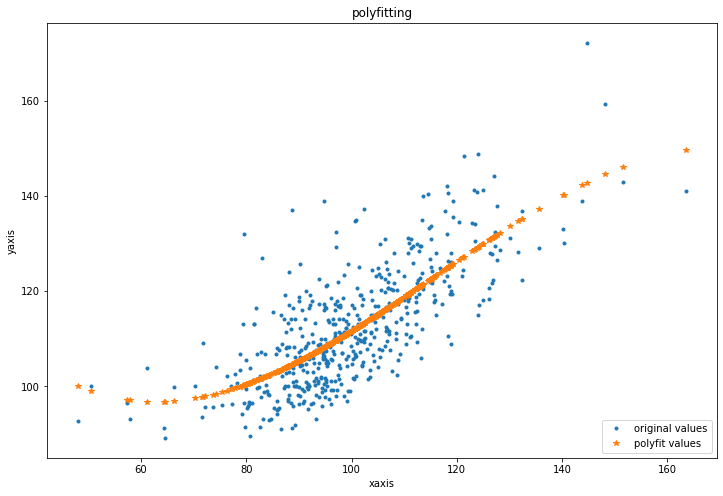

In [78]:
length = len(X)
print(length)
X2 = [X[i] for i in range(0,length,1)]
# X2=
yvals = p1(X2) #也可以使用yvals=np.polyval(z1,x)
plt.figure(figsize=(12,8))

plot1 = plt.plot(X,Y,'.',label='original values')

plot2 = plt.plot(X2,yvals,'*',label='polyfit values')

plt.xlabel('xaxis')

plt.ylabel('yaxis')

plt.legend(loc=4)  #指定legend的位置,读者可以自己help它的用法

plt.title('polyfitting')
plt.savefig('ploy.png')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 495
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bondPremRatio   495 non-null    float64
 1   closePriceBond  495 non-null    float64
 2   code            495 non-null    int64  
 3   firstDate       495 non-null    object 
 4   remainSize      495 non-null    float64
 5   innerValue      495 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 27.1+ KB


In [54]:
x=range(10)
y=list(map(lambda x:x**2,x))

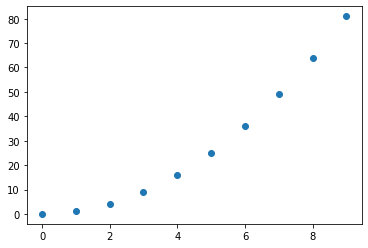

In [55]:
plt.scatter(x,y)

In [57]:
z2 = np.polyfit(x,y,2)
p2 = np.poly1d(z2)
print(p2)


   2
1 x - 3.544e-15 x + 1.534e-14


In [17]:
# 使用指数拟合
from scipy.optimize import curve_fit
def func(x,a,b):
      return a*np.exp(b/x)


popt,pcov=curve_fit(func,X,Y)

a=popt[0] #popt里面是拟合系数，读者可以自己help其用法

b=popt[1]

zs_yvals=func(X,a,b)

In [20]:
func(93.78,a,b)

109.0563598795809

In [28]:
func(90.60,a,b)

106.68551376638064

In [18]:
a

203.99004114640422

In [19]:
b

-58.72563272488835

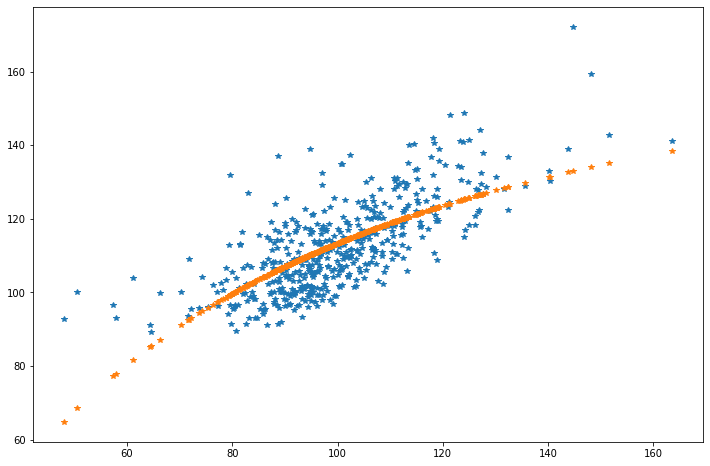

In [83]:
plt.figure(figsize=(12,8))
plt.plot(X,Y,'*')
plt.plot(X,yvals,'*')

In [84]:
predict_value =func(93.78,a,b)

In [85]:
predict_value

109.53367887283947

# pyecharts

In [11]:
scatter = (
    Scatter(init_opts=opts.InitOpts(width="1024px", height="768px",bg_color=JsCode(background_color_js)))
    .add_xaxis(xaxis_data=X)
    .add_yaxis(
        series_name="1111",
        y_axis=Y,
        symbol_size=3,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_series_opts()
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value", 
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
            
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
    )
)

# scatter.render_notebook()


In [38]:
X0=X[::10]
Y0=Y[::10]
zs_yvals0 = zs_yvals[::10]

In [25]:
sort_XY = list(sorted(zip(X,zs_yvals),key=lambda x:x[0]))

In [67]:
sort_XY[0]

(64.4042355805143, 81.96091101782773)

In [26]:
X0=[item[0] for item in sort_XY]
Y0=[item[1] for item in sort_XY]

In [27]:
scatter = (
    Scatter(init_opts=opts.InitOpts(width="1024px", height="768px",bg_color=JsCode(background_color_js)))
    .add_xaxis(xaxis_data=X)
    .add_yaxis(
        series_name="上市价格",
        y_axis=Y,
        symbol_size=5,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_series_opts()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='转债上市价格预测'),
        xaxis_opts=opts.AxisOpts(
            name='转股价值',
            type_="value", 
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name='转债上市首日收盘价',
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
            
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
    )
)

line = (
    Line()
    .add_xaxis(xaxis_data=X0)
    .add_yaxis(
        series_name="拟合曲线",
        # yaxis_index=1,
        symbol_size=5,
        y_axis=Y0,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=1,color='yellow'),
        
    ).set_colors("yellow") 
)
line2 = (
    Line()
    .add_xaxis(xaxis_data=[60,180])
    .add_yaxis(
        series_name="溢价率为0",
        # yaxis_index=1,
        symbol_size=5,
        y_axis=[60,180],
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=2,color='green'),
        
    ).set_colors("green") 
)
scatter.overlap(line)
scatter.overlap(line2)
# scatter.render_notebook()
scatter.render('预测.html')

'/home/xda/hub/convertible_bond/analysis/预测.html'

In [38]:
X.max()

163.63119448102998

In [39]:
Y.max()

172.18

In [62]:
# plt.xlabel('innerValue')
# plt.ylabel('closePriceBond')
data['closePriceBond'].argmax()

400

In [63]:
data.iloc[400]

bondPremRatio           18.967
closePriceBond          172.18
code                    113616
firstDate             20210122
remainSize                24.4
secShortNameBond          韦尔转债
innerValue          144.729211
Name: 400, dtype: object

In [42]:
data['closePriceBond'].argmax()

438

In [43]:
data.iloc[438]

bondPremRatio         18.967
closePriceBond        172.18
code                  113616
firstDate         2021-01-22
remainSize              24.4
innerValue        144.729211
Name: 438, dtype: object

In [44]:
data['bondPremRatio'].argmax()

1

In [45]:
data.iloc[1]

bondPremRatio        97.8684
closePriceBond        100.09
code                  110031
firstDate         2018-01-02
remainSize         23.994843
innerValue         50.584126
Name: 1, dtype: object

In [55]:
len(data)

458

In [30]:
def abs_error():
    count = len(Y)
    sum=0
    min_,min_index,max_,max_index=999999,0,0,0
    index=0
    for real,predict in zip(Y,zs_yvals):
        v=abs(real-predict)
        if v>max_:
            max_=v
            max_index=index
        if v<min_:
            min_=v
            min_index=index
        index+=1
        sum+=v
    return min_,min_index,max_,max_index,sum/count

In [31]:
abs_error()

(0.05362788445083311, 196, 36.2270261957664, 400, 6.934632608293214)

In [32]:
data.iloc[400]

bondPremRatio           18.967
closePriceBond          172.18
code                    113616
firstDate             20210122
remainSize                24.4
secShortNameBond          韦尔转债
innerValue          144.729211
Name: 400, dtype: object

In [44]:
Y[0]

104.18

In [18]:
scatter = (
    Scatter(init_opts=opts.InitOpts(width="800px", height="600px"))
    .add_xaxis(xaxis_data=X)
    .add_yaxis(
        series_name="转债价格",
        y_axis=Y,
        symbol_size=3,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_series_opts()
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            min_=60,
            
        )
    )
)

line = (
    Line()
    .add_xaxis(xaxis_data=X0)
    .add_yaxis(
        series_name="可转债价格预测",
        # yaxis_index=1,
        symbol_size=5,
        y_axis=Y0,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=1,color='yellow'),
        
    ).set_colors("yellow") 
)
scatter.overlap(line)
scatter.render_notebook()

In [15]:
import pyecharts.options as opts
from pyecharts.charts import Line, Grid
from pyecharts.commons.utils import JsCode

"""
参考地址: https://gallery.echartsjs.com/editor.html?c=xEyDk1hwBx
"""

x_data = ["14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
y_data = [393, 438, 485, 631, 689, 824, 987, 1000, 1100, 1200]

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#c86589'}, {offset: 1, color: '#06a7ff'}], false)"
)
area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#eb64fb'}, {offset: 1, color: '#3fbbff0d'}], false)"
)

c = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="注册总量",
        y_axis=y_data,
        is_smooth=True,
        is_symbol_show=True,
        symbol="circle",
        symbol_size=6,
        linestyle_opts=opts.LineStyleOpts(color="#fff"),
        label_opts=opts.LabelOpts(is_show=True, position="top", color="white"),
        itemstyle_opts=opts.ItemStyleOpts(
            color="red", border_color="#fff", border_width=3
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
        areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="我是标题",
            pos_bottom="5%",
            pos_left="center",
            title_textstyle_opts=opts.TextStyleOpts(color="#fff", font_size=16),
        ),
        xaxis_opts=opts.AxisOpts(
            name='我是x轴呢',
            type_="category",
            boundary_gap=False,
            axislabel_opts=opts.LabelOpts(margin=30, color="#ffffff63"),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=25,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
        ),
        yaxis_opts=opts.AxisOpts(
            name='我是y轴,右边的',
            type_="value",
            position="right",
            axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63"),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
            ),
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=15,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
        ),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

(
    Grid()
    .add(
        c,
        grid_opts=opts.GridOpts(
            pos_top="20%",
            pos_left="10%",
            pos_right="10%",
            pos_bottom="15%",
            is_contain_label=True,
        ),
    )
    .render_notebook()
)